**Linear Regression Project**

Import the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read Csv file

In [5]:
data= pd.read_csv('/content/SeoulBikeData.csv')
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# check shape of data
data.shape

(8760, 14)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

1. What are the factors that influence the number of bikes rented?

In [9]:
# other than date time, more or less every features of data influencing the number of bike rented
data_inf= data.columns[2:]
data_inf

Index(['Hour', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
data_corr=data.corr()
data_corr

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


2. Explore the data for outliers and missing values.


In [11]:
#check missing values
data_missing= data.isna().sum()
data_missing

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

there are no missing values in any features

boxplot is the best way to understand outliers

In [12]:
import seaborn as sns


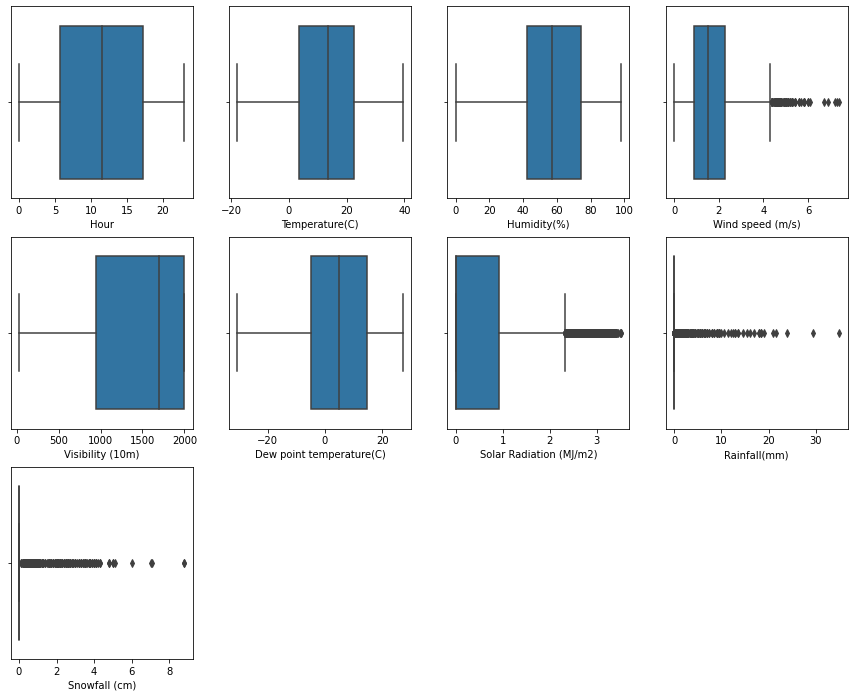

In [ ]:
plt.figure(figsize=(15,12))
plt.subplot(3,4,1)
sns.boxplot(x=data['Hour'])
plt.subplot(3,4,2)
sns.boxplot(x=data['Temperature(C)'])
plt.subplot(3,4,3)
sns.boxplot(x=data['Humidity(%)'])
plt.subplot(3,4,4)
sns.boxplot(x=data['Wind speed (m/s)'])
plt.subplot(3,4,5)
sns.boxplot(x=data['Visibility (10m)'])
plt.subplot(3,4,6)
sns.boxplot(x=data['Dew point temperature(C)'])
plt.subplot(3,4,7)
sns.boxplot(x=data['Solar Radiation (MJ/m2)'])
plt.subplot(3,4,8)
sns.boxplot(x=data['Rainfall(mm)'])
plt.subplot(3,4,9)
sns.boxplot(x=data['Snowfall (cm)'])


here 'hours', 'temperature','humidity', 'visibility' and 'due point temperature' has no outliers.
*   Any values in wind speed which are greater than 4.5 m/s are outliers
*   Any values in solar radiation which are greater than 2.3 mj/m2 are outliers
*   Any values other than 0 mm in rainfall are outliers
*   Any values other than 0 cm in snowfall are outliers

3. Plot the correlation between the variables and state your comments

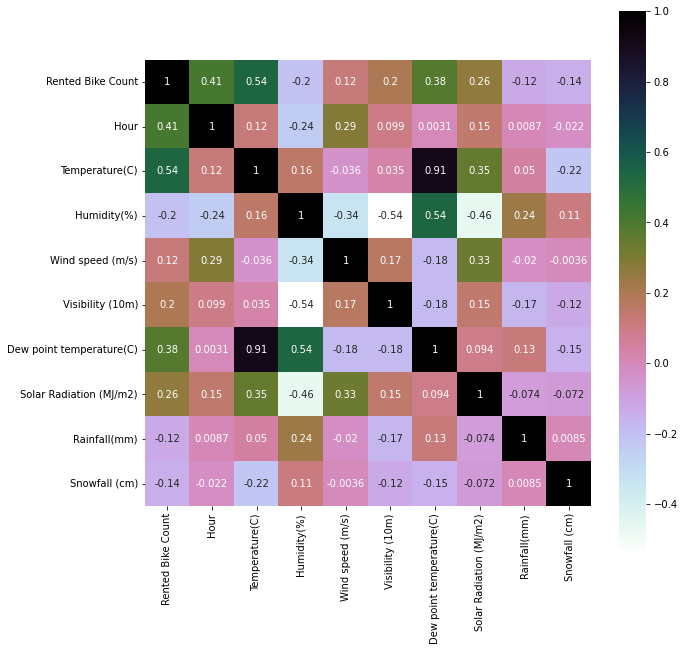

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(data_corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

From correlation heatmap it is clear that only Temperature,Hour,Dew point Temperaure and solar radiation are highly correlated with Rented bike . all other features are less correlated.temperature has a very high correlation with dew point temperature and hence both has the same variation so dew point temperature can be eliminated.

In [14]:
data =data.drop(['Dew point temperature(C)'],axis=1)

In [15]:
dataCorr=pd.DataFrame(data.corr().unstack().sort_values(ascending=False)['Rented Bike Count'],columns=['Correlation to the target'])
dataCorr.style.background_gradient(cmap=sns.light_palette("green", as_cmap=True))

,Correlation to the target
Rented Bike Count,1.000000
Temperature(C),0.538558
Hour,0.410257
Solar Radiation (MJ/m2),0.261837
Visibility (10m),0.199280
Wind speed (m/s),0.121108
Rainfall(mm),-0.123074
Snowfall (cm),-0.141804
Humidity(%),-0.199780


In [16]:
data['Date']=pd.to_datetime(data['Date'],format="%d/%m/%Y")

In [17]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes


4. Please build a linear regression model to predict rented bike count by choosing appropriate independentvariables.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso


creating variables


In [19]:
# variable that will distinguish between night and day
data['label_day_night']=data['Hour'].apply(lambda x : 'Night' if (x >20 or x<5) else( 'Day'))

In [21]:
# variable for month and weekday
data['WeekDay']=data["Date"].dt.day_name()
data['month']=data["Date"].dt.month

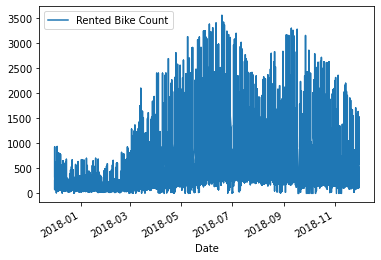

In [27]:
data.plot(x='Date',y='Rented Bike Count',kind='line')

In [25]:
reporting={}
X_LinearRegression=data.drop(['Rented Bike Count','Date','Seasons','Holiday','label_day_night','Functioning Day','WeekDay'],axis =1)
y=data.iloc[:,1]
X_train,X_test,y_train,y_test=train_test_split(X_LinearRegression,y,test_size=0.27)

In [28]:
regr = linear_model.LinearRegression()
fitregr=regr.fit(X_train, y_train)
predregrtrain=fitregr.predict(X_train)
predregrtest=fitregr.predict(X_test)

In [30]:

print('Linear model intercept: {} and the coefficients are: {}'
     .format(fitregr.intercept_,fitregr.coef_))

Linear model intercept: 417.6646983183892 and the coefficients are: [ 2.73297672e+01  3.15675715e+01 -7.73061218e+00  4.72273261e+00
  1.01924773e-02 -7.47348593e+01 -6.93250595e+01  1.46833127e+01
  7.51140866e+00]


the above model will be in the form of y= coefficient*x + intercept

the value of coefficient is high that will affect the accuracy score

In [39]:
train_set_r2 = r2_score(y_train, predregrtrain)
print('Linear model, R2 train score is : {}'.format(train_set_r2))
test_set_r2 = r2_score(y_test, predregrtest)
print('Linear model, R2 test score is : {}'.format(test_set_r2))

Linear model, R2 train score is : 0.47627645800845797
Linear model, R2 test score is : 0.4578786978194599


In [ ]:
#To improve the score we need to use either ridge regression or lasso regression